In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D,Input
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.models import Sequential
from keras.utils import to_categorical

C:\Users\peaks\AppData\Local\Temp\ipykernel_17032\1397311752.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = df_train['label']
y_train=to_categorical(y,num_classes=10)
df_train = df_train.drop(columns=['label'])


In [6]:
y = np.array(y.tolist())
X_tng = np.array(df_train).reshape(df_train.shape[0],28,28,1)/255
X_test = np.array(df_test).reshape(df_test.shape[0],28,28,1)/255

In [7]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [8]:
y_train.shape

(42000, 10)

In [9]:
X_tng.shape


(42000, 28, 28, 1)

In [10]:
X_test.shape

(28000, 28, 28, 1)

In [11]:
nn_model = Sequential([
    Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(units=256, activation="relu"),
    Dense(units=10, activation="softmax")
])

nn_model.compile(loss='categorical_crossentropy',
optimizer=Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [12]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 256)               3211520   
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [13]:
history = nn_model.fit(X_tng,y_train, epochs=30, validation_split=0.2)

Epoch 1/30


1050/1050 [==============================] - 24s 23ms/step - loss: 0.2022 - accuracy: 0.9380 - val_loss: 0.0779 - val_accuracy: 0.9758
Epoch 2/30
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0786 - accuracy: 0.9758 - val_loss: 0.0600 - val_accuracy: 0.9811
Epoch 3/30
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0519 - accuracy: 0.9827 - val_loss: 0.0604 - val_accuracy: 0.9807
Epoch 4/30
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0369 - accuracy: 0.9877 - val_loss: 0.0469 - val_accuracy: 0.9846
Epoch 5/30
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0303 - accuracy: 0.9899 - val_loss: 0.0453 - val_accuracy: 0.9869
Epoch 6/30
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0249 - accuracy: 0.9914 - val_loss: 0.0435 - val_accuracy: 0.9868
Epoch 7/30
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0181 - accuracy: 0.9938 - val_loss: 0.0475

In [25]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(1)

,loss,accuracy,val_loss,val_accuracy,epoch
29,0.005649,0.998125,0.071957,0.988571,29


In [26]:
import matplotlib.pyplot as plt

In [27]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.21207480126759037)

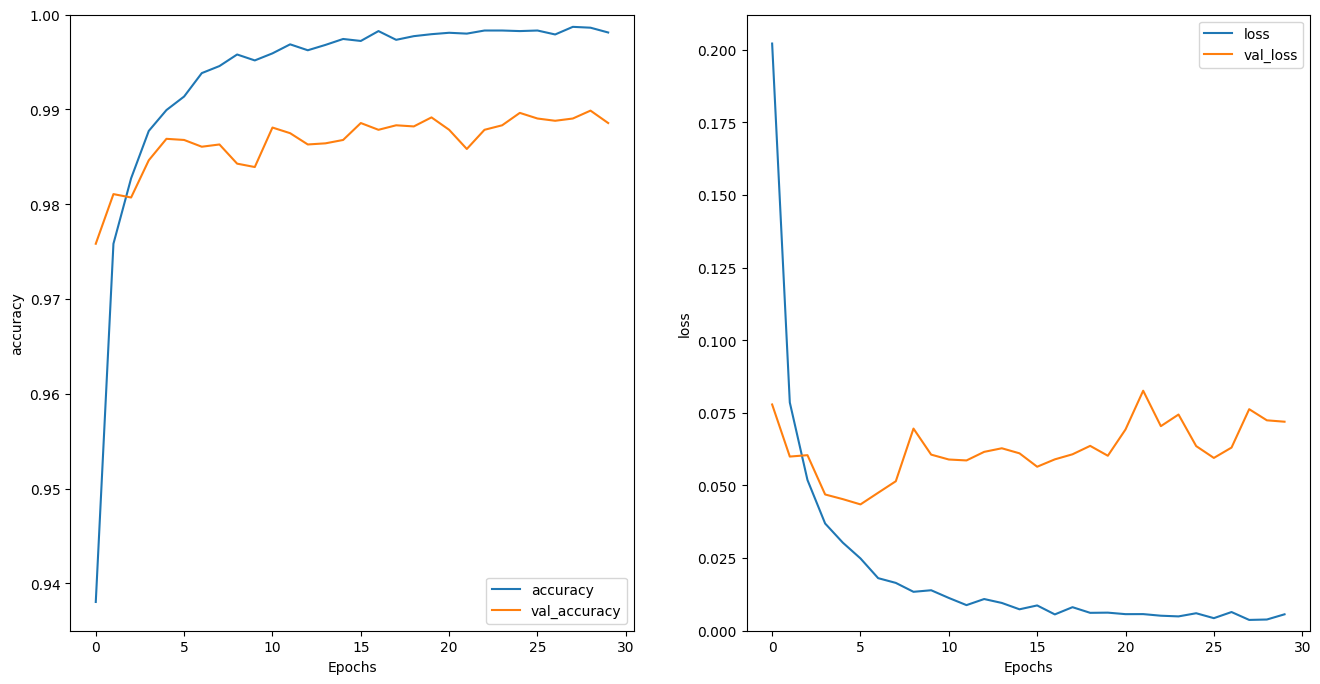

In [17]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [28]:
prediction = nn_model.predict(X_test)

875/875 [==============================] - 2s 3ms/step


In [29]:
prediction.shape

(28000, 10)

In [30]:
Y_predict = np.argmax(prediction, axis=1)

In [31]:
Y_predict

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [32]:
result = pd.DataFrame([i for i in range(1,len(Y_predict)+1)],columns=['ImageId'])

In [33]:
result['Label'] = Y_predict

In [34]:
result

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [35]:
result.to_csv('submission.csv', index=False)
result.to_csv(r'C:\Users\peaks\Desktop\Submission\submission.csv', index=False)